# Implementing 2FA for secure logging in

***Steps for authentication:***

1- Open your Authenticator App (e.g., Google Authenticator or Authy).

2- Add a New Account:

Manually enter the secret key into your authenticator app:
Tap "Add account" or the "+" icon.
Choose the option to enter a setup key manually.
Account Name: Set any name you like.
Key: Enter the secret key that was generated in the script (secret_key).
Type: Select Time-based.

1) install pyOTP for generating OTPs for 2FA

In [ ]:
!pip install pyotp
import pyotp


2) Generate a secret key for the user

In [ ]:
secret_key = pyotp.random_base32()
print("Your secret key (set up in your authenticator app):", secret_key)

Your secret key (set up in your authenticator app): J6HDMHYH4OO4MNZCAFM4SR2P4H6KY7T7


3) Verify the OTP assigned to the user

In [ ]:
user_otp = input("Enter the OTP from your authenticator app: ")
totp = pyotp.TOTP(secret_key)
if totp.verify(user_otp):
    print("OTP is valid!")
else:
    print("Invalid OTP!")

Enter the OTP from your authenticator app: 431039
OTP is valid!


# Implementing LSB for encryption

1) Start by installing stegano, the library we will be using for steganography

In [ ]:
!pip install stegano


2) Import lsb (least significant bit) for encryption from the library stegano


In [ ]:
from stegano import lsb

3) Add the function for encoding the message into an image

In [ ]:
from google.colab import files
from stegano import lsb

# Upload the image file
uploaded = files.upload()

# Assuming the user uploaded one image
input_image_path = list(uploaded.keys())[0]
secret_message = input("Enter the secret message to hide: ")

# Encode the message in the image
output_image_path = "encoded_image.png"
lsb.hide(input_image_path, secret_message).save(output_image_path)

# Download the encoded image
files.download(output_image_path)


Saving encoded_image.png to encoded_image.png


KeyboardInterrupt: Interrupted by user

4) Add the function for retrieving the secret message when given the image

In [ ]:
# Upload the encoded image file
uploaded = files.upload()

# Assuming the user uploaded one encoded image
encoded_image_path = list(uploaded.keys())[0]

# Reveal the hidden message
secret_message = lsb.reveal(encoded_image_path)
if secret_message:
    print("The hidden message is:", secret_message)
else:
    print("No hidden message found.")


Saving encoded_image.png to encoded_image (1).png
The hidden message is: 2cf24dba5fb0a30e26e83b2ac5b9e29eAQyNnGKbrZoy6ssoMtlt1g==


###TESTS

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()
path = list(uploaded.keys())[0]
message = input("enter a text to hide: ")


KeyboardInterrupt: 

In [ ]:
def hide(message, path):
  # Encode the message in a serie of 8-bit values
  binary_message = ''.join(["{:08b}".format(ord(x)) for x in message ])
  binary_message = [int(x) for x in binary_message]

  binary_message_length = len(binary_message)


  with Image.open(path) as img:
      channels = len(img.mode) #Incase the number of channels is greater than 3(RBGA)
      width, height = img.size
      data = np.array(img)
  print("Before Hiding")
  display(img)

  data = np.reshape(data, width*height*channels)# Flatten the image


  data[:binary_message_length] = data[:binary_message_length] & ~1 | binary_message #Make LSB zero with (&~1) then OR with the message

  # Reshape back to an image pixel array
  data = np.reshape(data, (height, width, channels))
  new_img = Image.fromarray(data)
  new_img.save('save.png')
  print("After Hiding")
  display(new_img)

In [ ]:
def uncover(path):
  with Image.open(path) as img:
    channels = len(img.mode)
    width, height = img.size
    data = np.array(img)

  data = np.reshape(data, width*height*channels)
  # extract lsb
  data = data & 1
  data = np.packbits(data) #group all the bits in the image into bytes

  msg = []
  for byte in data:
      char = chr(byte)
      if char == '\0':  # check if char is null
          break
      msg.append(char)
  print(message)

Before Hiding


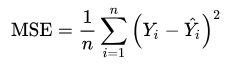

After Hiding


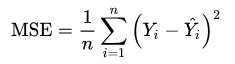

In [ ]:
hide(message, path)

In [ ]:
uncover('save.png')

THIS IS A TEST


In [ ]:
!pip install pycryptodome
!pip install stegano

TEST for AES Encryption implemented to steganography

In [ ]:
from stegano import lsb
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Util.Padding import unpad
from Crypto.Random import get_random_bytes
from google.colab import files

In [ ]:


# Input the encryption key
key = input("Enter the encryption key: ")

keyLength = 16

# Ensures that the key is 16 bytes
if len(key) < keyLength:
    key = (key * (keyLength // len(key) + 1))[:keyLength]
elif len(key) > keyLength:
    key = key[:keyLength]

key = key.encode('utf-8')  # Convert the key to bytes

# Input plaintext message
plaintextMessage = input("Enter the plaintext message to encrypt: ").encode('utf-8')

# Padding the plaintext
padded_plaintext = pad(plaintextMessage, AES.block_size)

# iv has 16 random bytes
iv = get_random_bytes(16)

# Create the cipher and encrypt using CBC mode
cipher = AES.new(key, AES.MODE_CBC, iv=iv)
ciphertext = cipher.encrypt(padded_plaintext)

# encoding using hex
encodedCiphertext = ciphertext.hex()


# File upload
uploaded = files.upload()

# Get the uploaded file path
imagePath = list(uploaded.keys())[0]

# Combine the IV (as hex) and the encoded ciphertext
ivInputHex = iv.hex()
hideMessage = ivInputHex + encodedCiphertext

# Encode the encrypted message (ciphertext and IV) in the image using LSB
hidden_image = lsb.hide(imagePath, hideMessage)

# Save the Image
encodedImagePath = "encoded_image.png"
hidden_image.save(encodedImagePath)

# File Download
files.download(encodedImagePath)


Enter the encryption key: hello
Enter the plaintext message to encrypt: this is a really secret message


Saving france-in-pictures-beautiful-places-to-photograph-eiffel-tower.jpg to france-in-pictures-beautiful-places-to-photograph-eiffel-tower.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Decryption...

In [ ]:


# Input the decryption key
key = input("Enter the decryption key: ")
keyLength = 16

# Ensures key length is 16
if len(key) < keyLength:
    key = (key * (keyLength // len(key) + 1))[:keyLength]
elif len(key) > keyLength:
    key = key[:keyLength]

key = key.encode('utf-8')  # Convert the key to bytes

# Upload image
print("Please upload the image to decrypt: ")
uploaded = files.upload()

encodedImagePath = list(uploaded.keys())[0]

# Extract the hidden message (IV and ciphertext) from the image
encodedMessage = lsb.reveal(encodedImagePath)


if encodedMessage is None:
    print("No hidden message found in the image.")
else:
        # Split the IV and the ciphertext
        ivInputHex = encodedMessage[:32]
        encoded_ciphertext = encodedMessage[32:]

        # Convert IV and ciphertext from hex to bytes
        iv = bytes.fromhex(ivInputHex)
        ciphertext = bytes.fromhex(encoded_ciphertext)

        # Create AES cipher and decrypt
        cipher = AES.new(key, AES.MODE_CBC, iv)
        decrypted_data = unpad(cipher.decrypt(ciphertext), AES.block_size)
        decryptedMessage = decrypted_data.decode('utf-8')

        print(f"Decrypted message: {decryptedMessage}")

Enter the decryption key: hello
Please upload the image to decrypt: 


Saving encoded_image.png to encoded_image (1).png
Decrypted message: this is a really secret message
